In [50]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")#call the class for adaboost
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import skew
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

In [4]:
df=pd.read_csv("Bank_Loan.csv")

In [5]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
df.drop("ID",axis=1,inplace=True)

In [9]:
df.drop("ZIP Code",axis=1,inplace=True)

In [10]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [12]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [13]:
df[df<0]=0

In [14]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [15]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

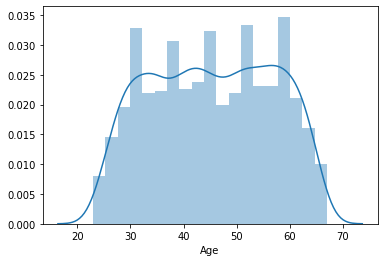

Age - -0.029331878574766698
-----------------------------------------------


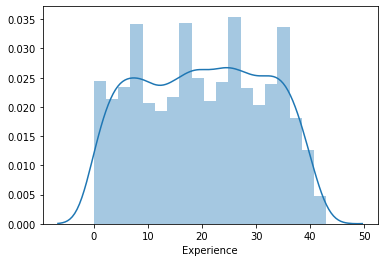

Experience - -0.017215538722506932
-----------------------------------------------


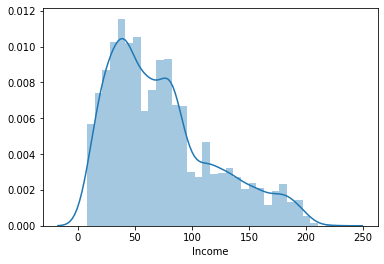

Income - 0.8410861846424931
-----------------------------------------------


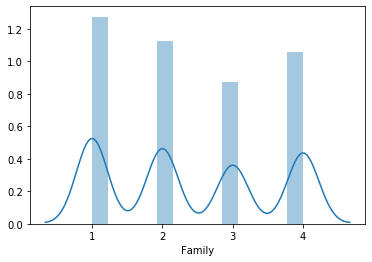

Family - 0.15517409936178264
-----------------------------------------------


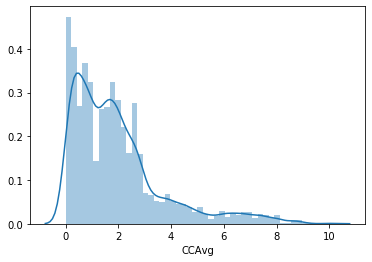

CCAvg - 1.5979637637001873
-----------------------------------------------


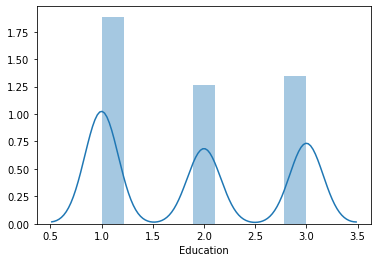

Education - 0.22702518198805896
-----------------------------------------------


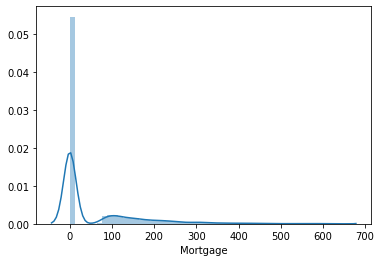

Mortgage - 2.103371065804789
-----------------------------------------------


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

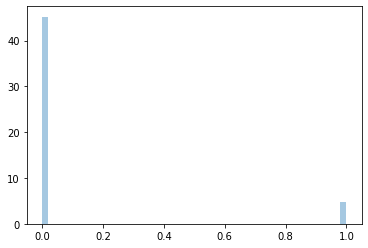

In [51]:
for col in df:
    plt.figure()
    sns.distplot(df[col])
    plt.show()
    
    print(col,"-",skew(df[col]))
    print("-----------------------------------------------")

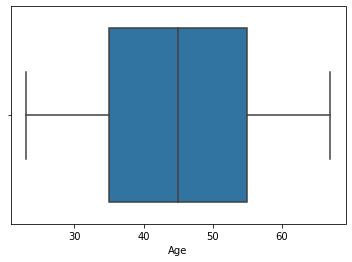

Age
-----------------------------------------------


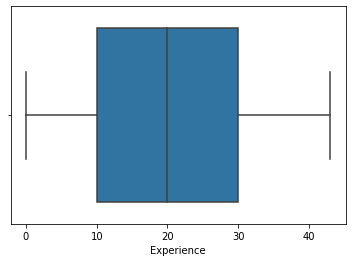

Experience
-----------------------------------------------


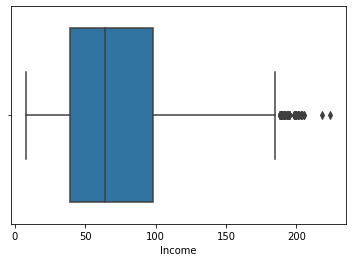

Income
-----------------------------------------------


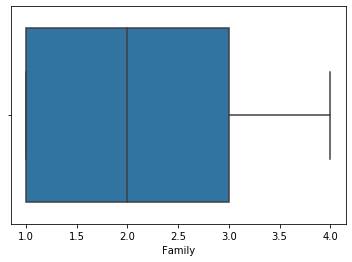

Family
-----------------------------------------------


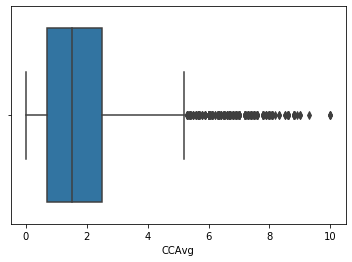

CCAvg
-----------------------------------------------


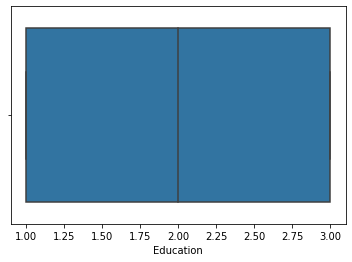

Education
-----------------------------------------------


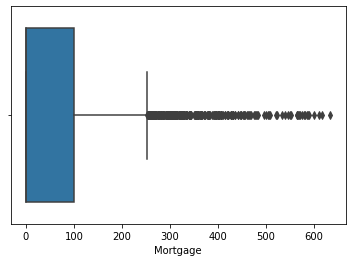

Mortgage
-----------------------------------------------


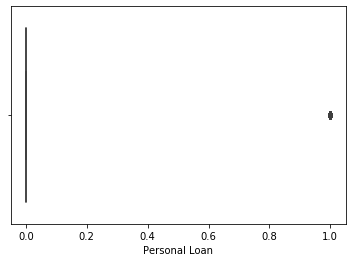

Personal Loan
-----------------------------------------------


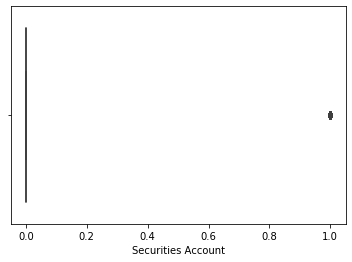

Securities Account
-----------------------------------------------


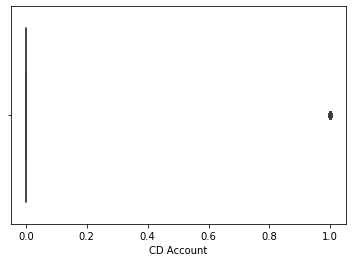

CD Account
-----------------------------------------------


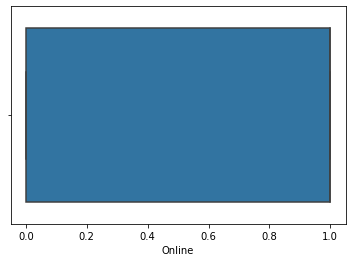

Online
-----------------------------------------------


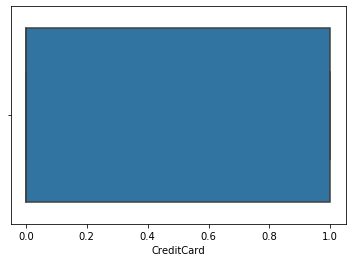

CreditCard
-----------------------------------------------


In [52]:
for col in df:
    plt.figure()
    sns.boxplot(df[col])
    plt.show()
    
    print(col)
    print("-----------------------------------------------")

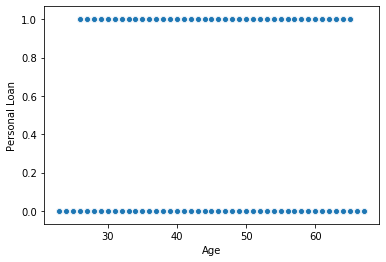

Age
-----------------------------------------------


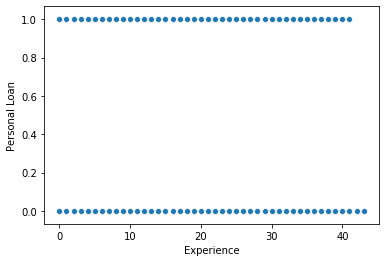

Experience
-----------------------------------------------


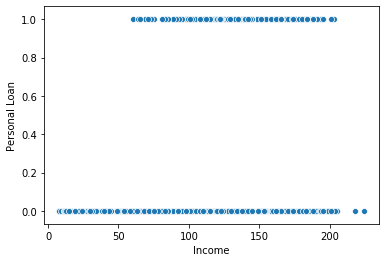

Income
-----------------------------------------------


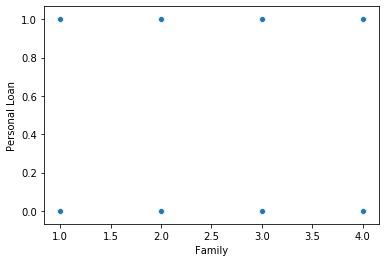

Family
-----------------------------------------------


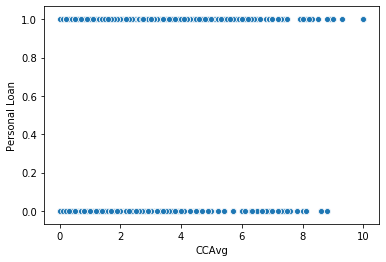

CCAvg
-----------------------------------------------


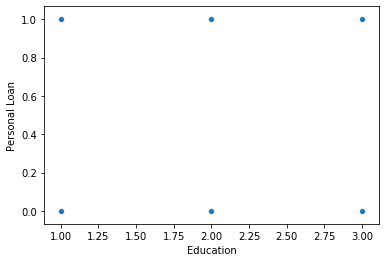

Education
-----------------------------------------------


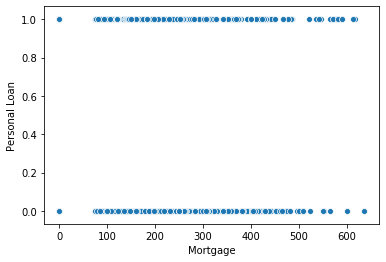

Mortgage
-----------------------------------------------


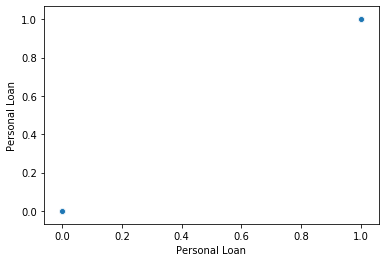

Personal Loan
-----------------------------------------------


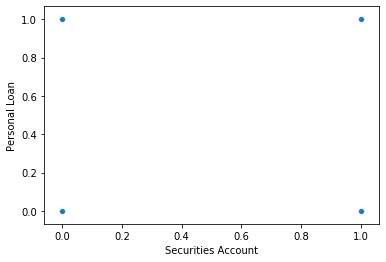

Securities Account
-----------------------------------------------


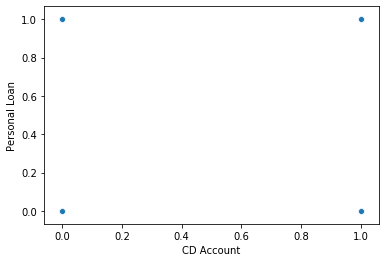

CD Account
-----------------------------------------------


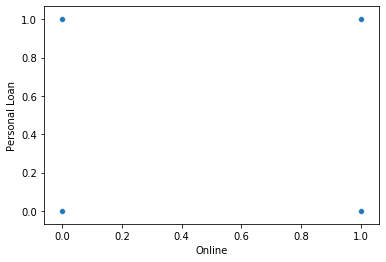

Online
-----------------------------------------------


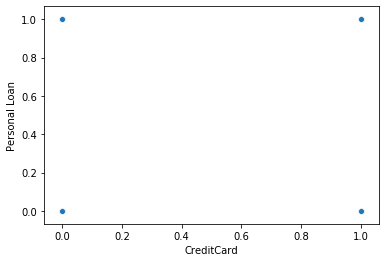

CreditCard
-----------------------------------------------


In [53]:
for col in df:
    plt.figure()
    sns.scatterplot(data=df,x=col,y="Personal Loan")
    plt.show()
    
    print(col)
    print("-----------------------------------------------")

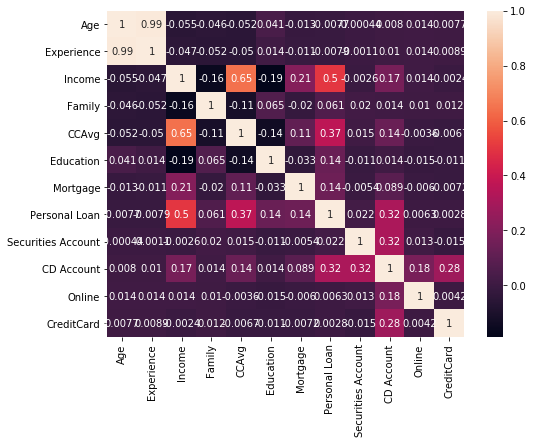

In [54]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [55]:
x=df.drop("Personal Loan",axis=1)
y=df["Personal Loan"]

In [56]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=0.3)

In [64]:
#create a function
def create_model(model):
    model.fit(x_train,y_train)#to train
    y_pred=model.predict(x_test)
    print(classification_report(y_test,y_pred))
    return model

In [60]:
#as we have used classification report we hhave to call the class for it
from sklearn.metrics import classification_report

# Baseline model is using Logistic Regression

# 1st Algorithm
Logistic Regression

In [61]:
#call class for logistic regression
from sklearn.linear_model import LogisticRegression

In [62]:
#create object for LogisticRegression class
lr=LogisticRegression()

In [65]:
#call the function "create_model"(for training and testing)
create_model(lr)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.83      0.55      0.66       149

    accuracy                           0.94      1500
   macro avg       0.89      0.77      0.82      1500
weighted avg       0.94      0.94      0.94      1500



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# 2nd Algorithm
Decision Tree Classifier

In [66]:
#call the class for DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [67]:
#create object of DecisionTreeClassifier class
dt=DecisionTreeClassifier()

In [68]:
#call function "create_model"(for training and testing)
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.91      0.89      0.90       149

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500



In [69]:
#to check the information gain (if information gain is high then the column will be important for making tree)
dt.feature_importances_

array([0.02805728, 0.01592237, 0.30948844, 0.16660563, 0.04663199,
       0.4014654 , 0.00555664, 0.        , 0.02571145, 0.00056079,
       0.        ])

In [70]:
#call the class for tree
from sklearn import tree

In [72]:
#keep all the input variables in features
features=x.columns

In [75]:
#(1) max_depth 
#we create a different object of DecisionTreeClasiifier and pass parameter for max_depth
dt1=DecisionTreeClassifier(max_depth=5) #not mpore than 8

In [76]:
#call function "create_model"(for training and testing)
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.91      0.89      0.90       149

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500



In [77]:
#(2) min_sample_leaf
#we create a different object of DecisionTreeClasiifier and pass parameter for min_sample_leaf
dt2=DecisionTreeClassifier(min_samples_leaf=45) #min 50

In [78]:
#call function "create_model"(for training and testing)
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1351
           1       1.00      0.75      0.86       149

    accuracy                           0.98      1500
   macro avg       0.99      0.88      0.92      1500
weighted avg       0.98      0.98      0.97      1500



In [79]:
#(3) entropy
#we create a different object of DecisionTreeClasiifier and pass parameter for min_sample_leaf
dt3=DecisionTreeClassifier(min_samples_leaf=45,criterion="entropy")

In [80]:
#call function "create_model"(for training and testing)
dt3=create_model(dt3)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1351
           1       0.88      0.85      0.87       149

    accuracy                           0.97      1500
   macro avg       0.93      0.92      0.93      1500
weighted avg       0.97      0.97      0.97      1500



In [ ]:
By using decision tree we get 0.98 of accuracy in min_samples_leaf and max_depth

# 3rd Algorithm

# Support Vector Machine

In [81]:
#call class form svm
from sklearn.svm import LinearSVC

In [82]:
#(1) Linear kernel (if suppose data is dsitributed lineraly)

In [83]:
#create object for LinearSVC
svc=LinearSVC(random_state=1,C=0.05) #c is paramete for adding error

In [84]:
#call function "create_model"(for training and testing)
create_model(svc)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1351
           1       0.69      0.44      0.54       149

    accuracy                           0.92      1500
   macro avg       0.81      0.71      0.75      1500
weighted avg       0.92      0.92      0.92      1500



LinearSVC(C=0.05, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [85]:
#The accuracy in Support vector Machine is 0.92

# Ensemblin Technique
Ada Boost

In [86]:
#call the class for adaboost
from sklearn.ensemble import AdaBoostClassifier

In [87]:
#create object of Adaboost
ada=AdaBoostClassifier(n_estimators=100)

In [88]:
#call function "create_model"
create_model(ada)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1351
           1       0.90      0.76      0.82       149

    accuracy                           0.97      1500
   macro avg       0.94      0.87      0.90      1500
weighted avg       0.97      0.97      0.97      1500



AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [89]:
#Accuracy with ada boost is 0.97

# 2. Gradient Boost

In [90]:
#call the class for GradientBoost
from sklearn.ensemble import GradientBoostingClassifier

In [91]:
#create object of GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100)

In [92]:
#call function"create_model"
create_model(gbc)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.95      0.87      0.91       149

    accuracy                           0.98      1500
   macro avg       0.97      0.93      0.95      1500
weighted avg       0.98      0.98      0.98      1500



GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [93]:
#Accuracy with Gradient boost is 0.98

# Naive

In [107]:
#create model list
model_list=[("Logistic",lr),("DecisonTree",dt),("DecisionTreeEntropy",dt3)]

In [108]:
#call class for hard voting
from sklearn.ensemble import VotingClassifier

In [109]:
# (A) HARD VOTING

In [110]:
#create object of VotingClassifier
vc=VotingClassifier(estimators=model_list) #by default it takes hard voting so if we are not specifying it will take hard voting

In [111]:
#call function "create_model"
create_model(vc)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1351
           1       0.97      0.83      0.90       149

    accuracy                           0.98      1500
   macro avg       0.98      0.91      0.94      1500
weighted avg       0.98      0.98      0.98      1500



VotingClassifier(estimators=[('Logistic',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('DecisonTree',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     cr...
                              DecisionTr

In [112]:
# (B) SOFT VOTING

In [113]:
#create object of VotingClassifier (for soft voting)
vc=VotingClassifier(estimators=model_list,voting="soft") 

In [114]:
#call function "create_model"
create_model(vc)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1351
           1       0.97      0.83      0.90       149

    accuracy                           0.98      1500
   macro avg       0.98      0.91      0.94      1500
weighted avg       0.98      0.98      0.98      1500



VotingClassifier(estimators=[('Logistic',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('DecisonTree',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     cr...
                              DecisionTr

# Bootstraping

In [115]:
#create model list
model_list=[("Logistic",lr),("DecisonTree",dt),("DecisionTreeEntropy",dt3)]

In [116]:
#call class for BaggingClassifier
from sklearn.ensemble import BaggingClassifier

In [117]:
# (A) BAGGING

In [118]:
#create object of BaggingClassifier
bc=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=10,random_state=1) #bydefault it is bagging

In [119]:
#call function "create_model"
create_model(bc)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1351
           1       0.00      0.00      0.00       149

    accuracy                           0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.81      0.90      0.85      1500



BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=10, n_estimators=10, n_jobs=None, oob_score=False,
                  random_state=1, ver

In [120]:
# (B) PASTING

In [121]:
#create object of BaggingClassifier
bc1=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=10,random_state=1,bootstrap=False)

In [122]:
#call function "create_model"
create_model(bc1)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1351
           1       0.00      0.00      0.00       149

    accuracy                           0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.81      0.90      0.85      1500



BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=10, n_estimators=10, n_jobs=None, oob_score=False,
                  random_state=1, ve

# RANDOM FOREST

In [94]:
#call class for RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [95]:
#create object of RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,max_features=7,random_state=1)

In [96]:
#call function "create_model"
create_model(rf)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1351
           1       0.95      0.86      0.90       149

    accuracy                           0.98      1500
   macro avg       0.97      0.93      0.95      1500
weighted avg       0.98      0.98      0.98      1500



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [97]:
#Accuracy with random forest is 0.98

In [98]:
model=GradientBoostingClassifier()

In [99]:
model.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [100]:
y_pred=model.predict(x_test)

In [102]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

In [103]:
print("Accuracy: %s%%" % (100*accuracy_score(y_pred,y_test)))

Accuracy: 98.2%


In [104]:
print(confusion_matrix(y_test,y_pred))

[[1344    7]
 [  20  129]]


In [105]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.95      0.87      0.91       149

    accuracy                           0.98      1500
   macro avg       0.97      0.93      0.95      1500
weighted avg       0.98      0.98      0.98      1500



In [125]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy: %s%%" % (100*accuracy_score(y_pred,y_test)))
print(confusion_matrix(y_test,y_pred))

Accuracy: 98.33333333333333%
[[1349    2]
 [  23  126]]


In [126]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy: %s%%" % (100*accuracy_score(y_pred,y_test)))
print(confusion_matrix(y_test,y_pred))

Accuracy: 97.86666666666667%
[[1338   13]
 [  19  130]]


# With Random Forest Classifier we get 98.3333% of accuracy in which 
True Positive is 1338
False Positive is 13
False Negative is 19
True Negative is 130